| **Inicio** | **atrás 2** | **Siguiente 4** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./2.TRATAMIENTO_DE_OUTLIERS.ipynb)| [⏩](./4.BALANCE_DE_DATOS.ipynb)|

# **3. SELECCIÓN DE CARACTERÍSTICAS**

## **Codificación de variables categóricas: one-hot vs dummy**

La codificación de variables categóricas es un proceso esencial en el análisis de datos cuando se trabaja con variables categóricas en algoritmos de aprendizaje automático. Dos enfoques comunes para codificar variables categóricas son el "`one-hot encoding`" (codificación one-hot) y el "`dummy encoding`" (codificación dummy). Ambos métodos convierten las variables categóricas en representaciones numéricas adecuadas para su uso en modelos de aprendizaje automático.

La codificación one-hot implica crear columnas binarias separadas para cada categoría en una variable categórica. Cada columna binaria indica la presencia o ausencia de una categoría en una observación determinada. Por ejemplo, si tenemos una variable categórica "`Color`" con tres categorías: "`Rojo`", "`Verde`" y "`Azul`", el codificado one-hot generaría tres columnas binarias: "`Color_Rojo`", "`Color_Verde`" y "`Color_Azul`". Para cada observación, se establecerá el valor 1 en la columna correspondiente a la categoría presente y 0 en las columnas de las categorías ausentes.

Por otro lado, la codificación `dummy` también convierte las variables categóricas en columnas numéricas, pero utiliza una estrategia ligeramente diferente. En lugar de crear una columna binaria para cada categoría, la codificación `dummy` crea una columna menos que la cantidad total de categorías. La categoría omitida se considera el valor de referencia. Por ejemplo, utilizando la misma variable categórica "`Color`" con tres categorías, el codificado `dummy` generaría dos columnas: "`Color_Verde`" y "`Color_Azul`". En estas columnas, se utilizará el valor 1 para indicar la presencia de la categoría correspondiente y 0 para indicar su ausencia. La categoría de referencia ("`Rojo`" en este caso) se puede inferir cuando todas las columnas son 0.

A continuación, se muestra un ejemplo de cómo realizar la codificación one-hot y dummy en Python utilizando las bibliotecas pandas y scikit-learn:

In [6]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Crear un DataFrame de ejemplo
data = {'Color': ['Rojo', 'Verde', 'Azul', 'Verde', 'Rojo']}
df = pd.DataFrame(data)

# Codificación one-hot
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoded = one_hot_encoder.fit_transform(df[['Color']])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(['Color']))
print("Codificación one-hot:")
print(one_hot_df)

# Codificación dummy
dummy_df = pd.get_dummies(df['Color'], drop_first=True)
print("\nCodificación dummy:")
print(dummy_df)

Codificación one-hot:
   Color_Azul  Color_Rojo  Color_Verde
0         0.0         1.0          0.0
1         0.0         0.0          1.0
2         1.0         0.0          0.0
3         0.0         0.0          1.0
4         0.0         1.0          0.0

Codificación dummy:
    Rojo  Verde
0   True  False
1  False   True
2  False  False
3  False   True
4   True  False


/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


En ambos casos, podemos observar cómo se crean las columnas codificadas correspondientes a las categorías de la variable "`Color`".

Es importante tener en cuenta que la elección entre la codificación `one-hot` y la codificación `dummy` depende del contexto y los requisitos del análisis. Si no se desea asumir un orden o relación ordinal entre las categorías, la codificación one-hot puede ser más apropiada. Por otro lado, si se desea tener una categoría de referencia y se asume un orden o relación ordinal, la codificación dummy puede ser más adecuada. Además, se debe considerar el impacto en la dimensionalidad de los datos, ya que la codificación one-hot puede generar más columnas y aumentar la complejidad del modelo.

![one-hot](../../img/one-hot.png "one-hot")

![dummy encoding](../../img/dummy%20encoding.png "dummy encoding")

## **Métodos para selección de variables**

Los métodos para la selección de variables son técnicas utilizadas en el análisis de datos y el aprendizaje automático para identificar las características más relevantes o informativas en un conjunto de datos. Estas técnicas son útiles para reducir la dimensionalidad de los datos, mejorar la precisión de los modelos y facilitar la interpretación de los resultados. Algunos de los métodos más comunes para la selección de variables son:

* **Selección basada en filtros:** Este enfoque evalúa las variables de forma independiente y selecciona aquellas que tienen una relación estadística significativa con la variable objetivo. Se utilizan métodos como la correlación, las pruebas estadísticas (como la prueba t o ANOVA) o medidas de importancia, como la ganancia de información o el coeficiente de correlación de Pearson. A continuación, se muestra un ejemplo de cómo calcular la correlación entre las variables y la variable objetivo en Python:

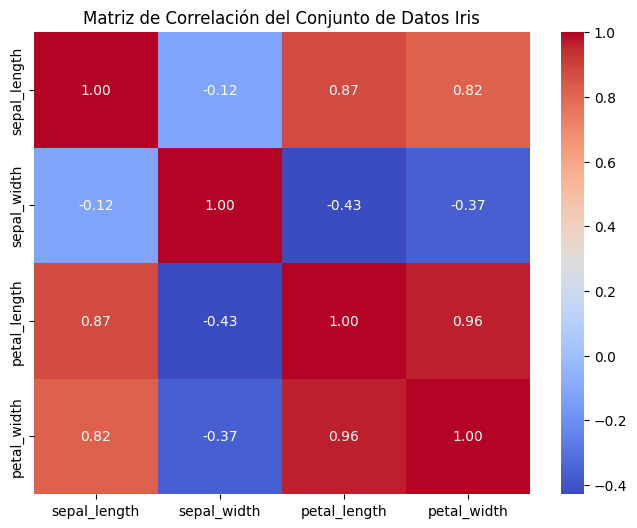

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # Asegúrate de importar numpy

# Cargar el conjunto de datos de ejemplo
data = sns.load_dataset('iris')

# Excluir la columna categórica 'species' y calcular la matriz de correlación
numeric_data = data.select_dtypes(include=[np.number])  # Esto asegura que sólo se incluyan columnas numéricas
correlation_matrix = numeric_data.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(8, 6))  # Ajustar el tamaño del gráfico si es necesario
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación del Conjunto de Datos Iris')
plt.show()

* **Selección basada en envoltorios:** En este enfoque, se utilizan algoritmos de aprendizaje automático para evaluar diferentes combinaciones de variables y determinar cuál conjunto de variables proporciona el mejor rendimiento del modelo. Esto implica entrenar y evaluar el modelo con diferentes conjuntos de características y seleccionar aquel que tenga el mejor desempeño. Un ejemplo común de selección basada en envoltorios es el algoritmo de eliminación recursiva de características (Recursive Feature Elimination, RFE). A continuación, se muestra un ejemplo de cómo aplicar RFE utilizando la biblioteca scikit-learn en Python:

In [8]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Crear el clasificador
model = LogisticRegression(max_iter=1000)

# Crear el objeto RFE
rfe = RFE(estimator=model, n_features_to_select=3)

# Ajustar el modelo RFE a los datos
X = data.drop('species', axis=1)
y = data['species']
rfe.fit(X, y)

# Obtener las variables seleccionadas
selected_features = X.columns[rfe.support_]
print("Variables seleccionadas:")
print(selected_features)

Variables seleccionadas:
Index(['sepal_width', 'petal_length', 'petal_width'], dtype='object')


* **Selección basada en incrustaciones (embeddings):** Este enfoque implica entrenar un modelo de aprendizaje automático y utilizar las características aprendidas o los pesos asignados a las características como una medida de importancia. Algunos ejemplos de métodos basados en incrustaciones son los modelos de regresión con regularización L1 (como la regresión LASSO) y los árboles de decisión (que proporcionan una medida de importancia de las características). A continuación, se muestra un ejemplo de cómo utilizar la regresión LASSO para seleccionar variables en Python:

In [9]:
from sklearn.linear_model import Lasso

# Codificación one-hot
encoded_data = pd.get_dummies(data, columns=['species'])

# Crear el clasificador LASSO
lasso = Lasso(alpha=0.1)

# Ajustar el modelo LASSO a los datos
X = encoded_data.drop('species_setosa', axis=1)  # Eliminamos una columna para evitar la multicolinealidad
y = encoded_data['species_setosa']
lasso.fit(X, y)

# Obtener las variables seleccionadas
selected_features = X.columns[lasso.coef_ != 0]
print("Variables seleccionadas:")
print(selected_features)

Variables seleccionadas:
Index(['petal_length'], dtype='object')


Estos son solo algunos ejemplos de métodos para la selección de variables. Es importante tener en cuenta que la elección del método dependerá del problema específico y del contexto de análisis de datos. Además, es recomendable evaluar y comparar diferentes métodos para determinar cuál es el más adecuado para el conjunto de datos y los objetivos del análisis.

## **Varianza**

La varianza es una medida estadística que indica la dispersión de los valores de una variable. En el contexto de la selección de características, la varianza se utiliza como criterio para evaluar la importancia de una característica en relación con la variable objetivo.

Cuando trabajamos con conjuntos de datos, es común encontrarnos con características que tienen una varianza muy baja, lo que significa que sus valores apenas varían entre las instancias del conjunto de datos. Estas características con baja varianza pueden no contener información relevante para la tarea de modelado y predicción, y pueden ser eliminadas para simplificar el modelo y mejorar su rendimiento.

A continuación, te mostraré un ejemplo de cómo calcular la varianza de las características y cómo utilizarla en la selección de características utilizando el conjunto de datos de flores `iris` (`iris dataset`) de la biblioteca scikit-learn en Python:

In [10]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import VarianceThreshold

# Cargar el conjunto de datos
iris = load_iris()
X = iris.data
y = iris.target

# Calcular la varianza de las características
selector = VarianceThreshold(threshold=0.2)
X_high_variance = selector.fit_transform(X)

# Obtener las características seleccionadas
selected_features = [iris.feature_names[i] for i in selector.get_support(indices=True)]
print("Características seleccionadas:")
print(selected_features)

Características seleccionadas:
['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']


En este ejemplo, utilizamos la clase `VarianceThreshold` de scikit-learn para calcular la varianza de las características. El parámetro `threshold` se utiliza para especificar un umbral mínimo de varianza. Las características con una varianza por debajo de este umbral se consideran de baja varianza y se eliminan.

En el caso del ejemplo, hemos establecido un umbral de 0.2, lo que significa que las características con una varianza menor a 0.2 serán eliminadas. Luego, utilizamos el método `fit_transform()` para ajustar el selector a los datos y transformar el conjunto de datos original `X` en `X_high_variance`, que contiene solo las características seleccionadas.

Finalmente, utilizamos el método `get_support()` para obtener una máscara booleana de las características seleccionadas y usamos esta máscara para obtener los nombres de las características seleccionadas del conjunto de datos original.

Recuerda que el valor del umbral de varianza puede variar según tus necesidades y el conjunto de datos específico que estés utilizando. Es importante evaluar el efecto de la selección de características en el rendimiento del modelo y ajustar el umbral en consecuencia.

## **Prueba de hipótesis**

La prueba de hipótesis es una técnica estadística utilizada para tomar decisiones sobre afirmaciones o suposiciones acerca de una población basándose en evidencia muestral. Consiste en formular dos hipótesis: la hipótesis nula (`H0`) y la hipótesis alternativa (`H1`). La hipótesis nula establece que no hay efecto o diferencia entre las variables, mientras que la hipótesis alternativa plantea que existe un efecto o diferencia significativa.

El proceso de prueba de hipótesis implica los siguientes pasos:

1. **Establecer las hipótesis:**

* **Hipótesis nula (H0):** Afirma que no hay efecto o diferencia entre las variables.
* **Hipótesis alternativa (H1):** Afirma que hay un efecto o diferencia significativa.

2. **Definir el nivel de significancia (alfa):**

* El nivel de significancia (alfa) es la probabilidad máxima aceptada de cometer un error tipo `I`, es decir, rechazar la hipótesis nula cuando es verdadera. Es común utilizar un nivel de significancia de 0.05 (5%).

3. **Recolectar y analizar los datos:**

Se recopilan los datos relevantes y se realiza el análisis estadístico adecuado para comparar los resultados muestrales con las hipótesis establecidas.

4. **Calcular el estadístico de prueba:**

Se calcula una medida estadística utilizando los datos muestrales, que nos ayudará a tomar una decisión sobre las hipótesis.

5. **Tomar una decisión:**

* Se compara el valor calculado del estadístico de prueba con un valor crítico o se utiliza un enfoque de `p-value` (valor p) para determinar si se rechaza o no la hipótesis nula.
* Si el valor calculado del estadístico de prueba es menor que el valor crítico o el valor `p` es menor que el nivel de significancia (alfa), se rechaza la hipótesis nula y se acepta la hipótesis alternativa.
* Si el valor calculado del estadístico de prueba es mayor que el valor crítico o el valor `p` es mayor que el nivel de significancia (alfa), no se rechaza la hipótesis nula y se concluye que no hay suficiente evidencia para respaldar la hipótesis alternativa.

A continuación, te mostraré un ejemplo de cómo realizar una prueba de hipótesis en Python utilizando la biblioteca scipy.stats:

In [11]:
import numpy as np
from scipy import stats

# Generar dos muestras de datos
np.random.seed(0)
sample1 = np.random.normal(loc=10, scale=2, size=100)
sample2 = np.random.normal(loc=12, scale=2, size=100)

# Realizar una prueba t de dos muestras
t_statistic, p_value = stats.ttest_ind(sample1, sample2)

# Imprimir los resultados
print("Estadístico de prueba:", t_statistic)
print("Valor p:", p_value)

# Tomar una decisión
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula")
else:
    print("No se rechaza la hipótesis nula")

Estadístico de prueba: -7.0414273690132765
Valor p: 3.059820094513985e-11
Se rechaza la hipótesis nula


En este ejemplo, generamos dos muestras de datos: `sample1` y `sample2`. Luego, utilizamos la función `ttest_ind()` de la biblioteca scipy.stats para realizar una prueba `t` de dos muestras. Esta prueba compara las medias de las dos muestras y devuelve el estadístico de prueba y el valor `p`.

El valor `p` representa la probabilidad de obtener el estadístico de prueba observado (o uno más extremo) bajo la suposición de que la hipótesis nula es verdadera. Si el valor `p` es menor que el nivel de significancia (alfa), se rechaza la hipótesis nula y se concluye que hay evidencia suficiente para respaldar la hipótesis alternativa.

En el ejemplo, utilizamos un nivel de significancia de 0.05 (5%). Si el valor `p` es menor que 0.05, imprimimos "Se rechaza la hipótesis nula"; de lo contrario, imprimimos "No se rechaza la hipótesis nula".

Es importante tener en cuenta que la elección del tipo de prueba de hipótesis y el análisis adecuado depende del tipo de datos y del objetivo de la prueba. En este ejemplo, utilizamos una prueba `t` de dos muestras, pero existen otros tipos de pruebas de hipótesis para diferentes situaciones.

## **Basados en la importancia**

Los métodos basados en la importancia son técnicas utilizadas en la selección de características para evaluar y clasificar la importancia de cada variable en un conjunto de datos. Estos métodos proporcionan una medida de la relevancia o contribución de cada característica para predecir la variable objetivo.

Existen diferentes enfoques para calcular la importancia de las características, y uno de los métodos más comunes es el algoritmo de `Random Forest`. El `Random Forest` es un algoritmo de aprendizaje supervisado que construye múltiples árboles de decisión y combina sus resultados para realizar predicciones más precisas. La importancia de una característica se calcula midiendo cuánto mejora la precisión de las predicciones al considerar esa característica en particular.

A continuación, te mostraré un ejemplo de cómo utilizar `Random Forest` para calcular la importancia de las características en Python utilizando la biblioteca scikit-learn:

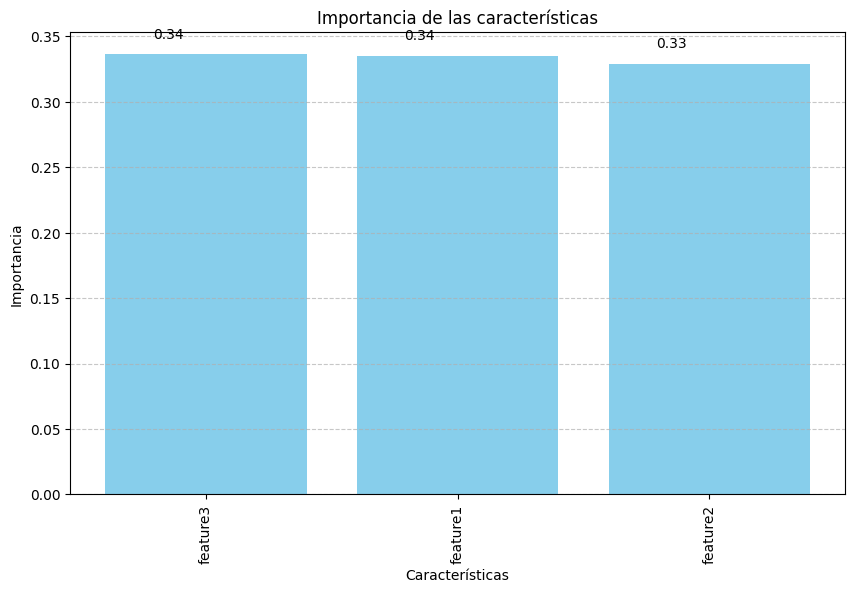

In [12]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Crear un diccionario con datos de ejemplo
data_dict = {
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'feature3': np.random.rand(100),
    'columna_objetivo': np.random.randint(0, 2, 100)
}

# Crear el DataFrame
data = pd.DataFrame(data_dict)

# Preparar los datos dividiendo las características (X) y la variable objetivo (y)
X = data.drop('columna_objetivo', axis=1)
y = data['columna_objetivo']

# Crear el clasificador Random Forest
clf = RandomForestClassifier()

# Ajustar el modelo a los datos
clf.fit(X, y)

# Obtener la importancia de las características
importance = clf.feature_importances_

# Obtener los nombres de las características
feature_names = X.columns

# Ordenar las características por importancia descendente
indices = np.argsort(importance)[::-1]
sorted_feature_names = feature_names[indices]

# Personalizar la gráfica de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(importance)), importance[indices], color='skyblue')

# Añadir etiquetas y título
plt.xticks(range(len(importance)), sorted_feature_names, rotation=90)
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.title("Importancia de las características")

# Añadir anotaciones con los valores de importancia en cada barra
for bar, val in zip(bars, importance[indices]):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.01, f'{val:.2f}', ha='center', va='bottom', color='black')

# Añadir cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.show()

En el gráfico de barras, las características se muestran en el eje `x`, mientras que la importancia se muestra en el eje `y`. Las barras representan la importancia relativa de cada característica, y están ordenadas de mayor a menor importancia. Esto te permite identificar rápidamente las características más importantes en tu conjunto de datos.

Recuerda reemplazar '`columna_objetivo`' por el nombre correcto de la columna objetivo en tu conjunto de datos. Además, asegúrate de tener los datos cargados adecuadamente en tu DataFrame y que estés utilizando un clasificador adecuado para tu problema.

## **División de datos en entrenamiento y pruebas**

La división de datos en entrenamiento y pruebas es una técnica común en el aprendizaje automático (machine learning) para evaluar el rendimiento de un modelo. Consiste en dividir el conjunto de datos en dos partes: una parte se utiliza para entrenar el modelo y la otra parte se utiliza para probar el rendimiento del modelo entrenado.

La división de datos en entrenamiento y pruebas es importante para evaluar cómo se desempeñará el modelo en datos nuevos, no vistos durante el entrenamiento. Esto ayuda a detectar si el modelo ha aprendido correctamente o si está sobreajustado a los datos de entrenamiento.

Aquí tienes un ejemplo de cómo dividir los datos en entrenamiento y pruebas utilizando Python y scikit-learn:

In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Cargar los datos de iris
iris = load_iris()

# Crear un DataFrame con las características
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Crear una Serie con la variable objetivo
y = pd.Series(iris.target, name='target')

# Dividir los datos en entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imprimir la forma de los conjuntos de entrenamiento y pruebas
print("Forma del conjunto de entrenamiento:")
print(X_train.shape, y_train.shape)
print("Forma del conjunto de pruebas:")
print(X_test.shape, y_test.shape)

Forma del conjunto de entrenamiento:
(120, 4) (120,)
Forma del conjunto de pruebas:
(30, 4) (30,)


1. **from sklearn.datasets import load_iris:** Importa la función `load_iris` del módulo `sklearn.datasets`. Esta función se utiliza para cargar el conjunto de datos de Iris, que es un conjunto de datos clásico utilizado en la clasificación de flores Iris.

2. **from sklearn.model_selection import train_test_split:** Importa la función `train_test_split` del módulo `sklearn.model_selection`. Esta función se utiliza para dividir los datos en conjuntos de entrenamiento y prueba.

3. **iris = load_iris():** Carga el conjunto de datos de Iris utilizando la función `load_iris()`. El conjunto de datos de Iris contiene información sobre las características de las flores Iris y la especie a la que pertenecen.

4. **X = pd.DataFrame(iris.data, columns=iris.feature_names):** Crea un DataFrame `X` con las características de las flores Iris. `iris.data` contiene las características y `iris.feature_names` contiene los nombres de las características.

5. **y = pd.Series(iris.target, name='target'):** Crea una Serie y con la variable objetivo o etiquetas de las flores Iris. `iris.target` contiene las etiquetas de especies de las flores.

6. **X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42):** Divide los datos en conjuntos de entrenamiento y prueba utilizando la función `train_test_split`. `X` y `y` son los datos a dividir, test_size=0.2 indica que el 20% de los datos se utilizarán como conjunto de prueba, y `random_state=42` establece una semilla para garantizar la reproducibilidad de la división.

7. **print("Forma del conjunto de entrenamiento:") y print(X_train.shape, y_train.shape):** Imprime la forma del conjunto de entrenamiento, que es el número de muestras y características en `X_train` y el número de etiquetas en `y_train`.

8. **print("Forma del conjunto de pruebas:") y print(X_test.shape, y_test.shape):** Imprime la forma del conjunto de prueba, que es el número de muestras y características en `X_test` y el número de etiquetas `en y_test`.

En resumen, este código carga el conjunto de datos de Iris, lo divide en conjuntos de entrenamiento y prueba, y muestra la forma de cada conjunto.

| **Inicio** | **atrás 2** | **Siguiente 4** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./2.TRATAMIENTO_DE_OUTLIERS.ipynb)| [⏩](./4.BALANCE_DE_DATOS.ipynb)|